#  QUESTION 4: Applied PCA

# 4.1 EigenFaces [10pts]


## Q1:"MEAN FACE"


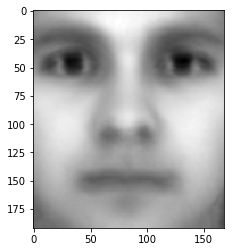

In [124]:
view_list = ['P00A+025E+00', 'P00A+110E+65', 'P00A-050E+00', 'P00A+035E+15', 'P00A+110E-20', 'P00A-050E-40', 'P00A+035E+40', 'P00A+120E+00', 'P00A-060E+20', 'P00A+000E+00', 'P00A+035E+65', 'P00A+130E+20', 'P00A-060E-20', 'P00A+000E+20', 'P00A+035E-20', 'P00A-005E+10', 'P00A-070E+00', 'P00A+000E+45', 'P00A+050E+00', 'P00A-005E-10', 'P00A-070E+45', 'P00A+000E+90', 'P00A+050E-40', 'P00A-010E+00', 'P00A-070E-35', 'P00A+000E-20', 'P00A+060E+20', 'P00A-010E-20', 'P00A-085E+20', 'P00A+000E-35', 'P00A+060E-20', 'P00A-015E+20', 'P00A-085E-20', 'P00A+005E+10', 'P00A+070E+00', 'P00A-020E+10', 'P00A-095E+00', 'P00A+005E-10', 'P00A+070E+45', 'P00A-020E-10', 'P00A-110E+15', 'P00A+010E+00', 'P00A+070E-35', 'P00A-020E-40', 'P00A-110E+40', 'P00A+010E-20', 'P00A+085E+20', 'P00A-025E+00', 'P00A-110E+65', 'P00A+015E+20', 'P00A+085E-20', 'P00A-035E+15', 'P00A-110E-20', 'P00A+020E+10', 'P00A+095E+00', 'P00A-035E+40', 'P00A-120E+00', 'P00A+020E-10', 'P00A+110E+15', 'P00A-035E+65', 'P00A-130E+20', 'P00A+020E-40', 'P00A+110E+40', 'P00A-035E-20']

from PIL import Image
import matplotlib.image as mimg
import glob
import os
import numpy as np
image_list = []
full_lst=[]
y_labs=[]
for f in os.listdir('CroppedYale/'):
    if(f!="__MACOSX"):
        for filename in glob.glob('CroppedYale/'+f+'/*.png'):
             if 'ambient' not in filename.lower():
                image=mimg.imread(filename)
                flat_img=image.ravel()
                flat_img=flat_img.astype(np.float32)/255
                image_list.append(flat_img)
                y_labs.append(f)
img_arr = np.asarray(image_list)
mean_fc = np.mean(img_arr,axis=0)
mean_fc_re = mean_fc.reshape(192,168)
im = Image.fromarray(mean_fc_re)
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(np.asarray(im),cmap="gray")

## Q2:"DE-MEAN MATTRIX"

Step1: Demeaning Mattrix

In [125]:
dmean_mtrx = img_arr-mean_fc

Step2:Fitting PCA

In [126]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.fit_transform(dmean_mtrx)
v = pca.explained_variance_
values=np.arange(len(v))+1

Step3: Plotting a screen plot

We  see an elbow in the scree plot which can help us as a heuristic on choosing the number of principal components to retain 
      for dimensionality reduction


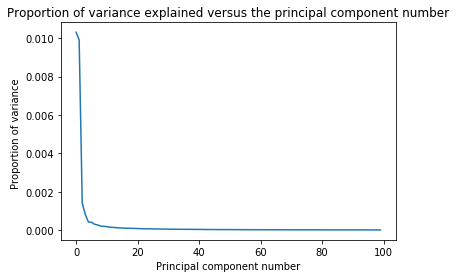

In [127]:
import matplotlib.pyplot as plt
plt.plot(v[:100])
plt.xlabel('Principal component number')
plt.ylabel('Proportion of variance ')
plt.title('Proportion of variance explained versus the principal component number')
print("""We  see an elbow in the scree plot which can help us as a heuristic on choosing the number of principal components to retain 
      for dimensionality reduction""")

## Q3:Plotting the "Eigen Faces"

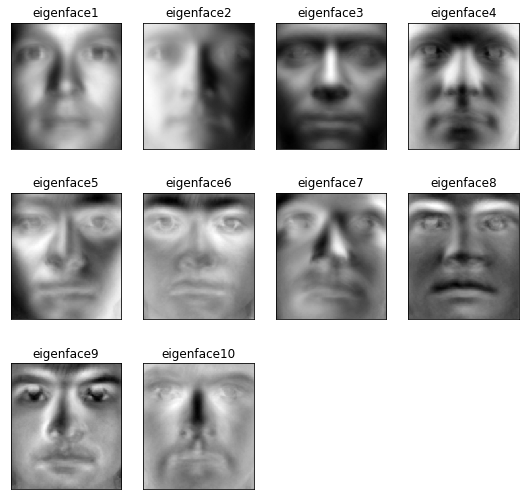

In [128]:
titles=[]
pca = decomposition.PCA(10) # n_components is the components number after reduction
x_r = pca.fit(dmean_mtrx).transform(dmean_mtrx)
h=192
w=168
images  = pca.components_.reshape((10, h,w))
n_row=3
n_col=4
for i in range(10):
    titles.append("eigenface"+str(i+1))
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(10):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

## Q4: Projection Matrix computation(P) and plotting seperate Histograms for each of the ﬁrst 10 PCA projections

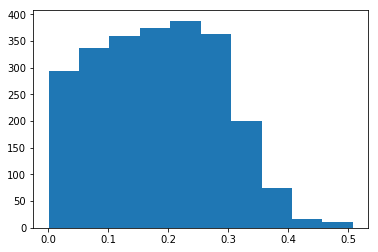

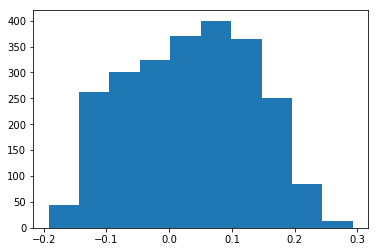

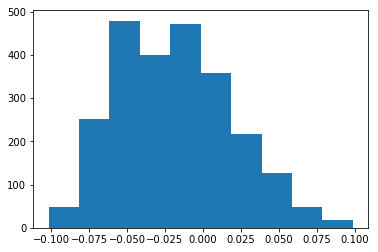

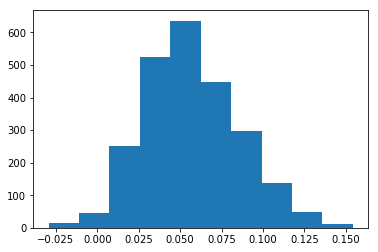

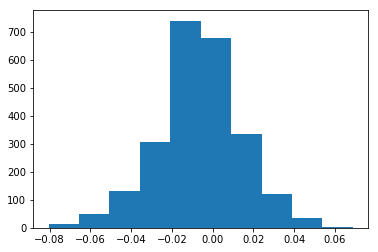

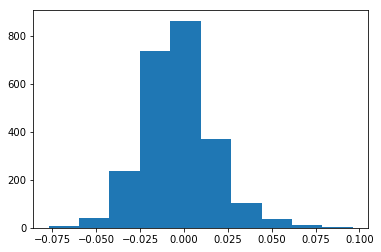

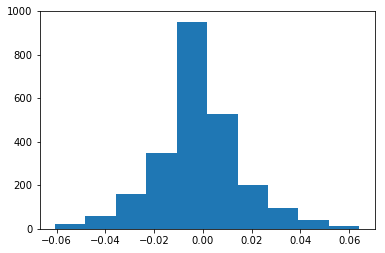

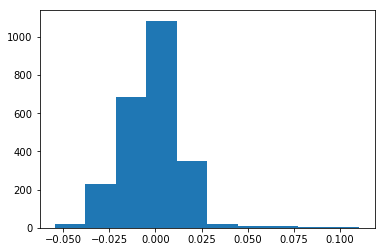

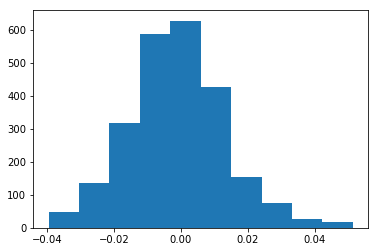

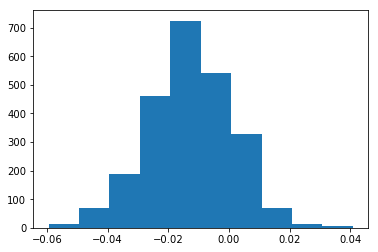

In [129]:
pca = decomposition.PCA()
x_r = pca.fit(dmean_mtrx).transform(dmean_mtrx)
E =pca.components_
P = img_arr @ E.T
import matplotlib.pyplot as plt
for i in range(10):
    plt.hist(P[:,i])
    plt.show()

# 4.2 PCA on Text Corpus [5pts]

Step 0: Loading Desired Files

In [130]:
import pandas as pd
xtrain = pd.read_csv("onion_vs_economist/XTrain.csv",header=0)
vocab= pd.read_csv("onion_vs_economist/vocabulary.csv",header=None)

Step 1: Fitting PCA ON XTRAIN

In [131]:
pca = decomposition.PCA()
pca_ft = pca.fit(xtrain)

## Q1: Provide a list of the top-30 words from Vocabulary according to top Principal Component

In [132]:
max_explained_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[-1]
best_component = pd.DataFrame(pca.components_[0])
best_component["coff"]=abs(best_component[0])
best_component["words"]=vocab
del best_component[0]
best_component = best_component.sort_index(by=['coff'], ascending=[False])
top_30 = best_component[:30]
pd.DataFrame(top_30["words"])
lst_top_30 = list(top_30["words"])
print("Follwoing is a list of the top-30 words from Vocabulary according to top Principal Component:")
pd.DataFrame(lst_top_30)

Follwoing is a list of the top-30 words from Vocabulary according to top Principal Component:


C:\Users\Anupam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


,0
0,help
1,power
2,do
3,now
4,there
5,may
6,also
7,seem
8,few
9,peopl


## Q2: How many of the top-30 words in the list are stopwords?

In [133]:
f = open("onion_vs_economist/stopwords.txt")
text = f.readlines()[0]
counter=0
for i in lst_top_30:
    if i in text:
        counter=counter+1
print(" How many of the top-30 words in the list are stopwords :",counter)

 How many of the top-30 words in the list are stopwords : 12


#  QUESTION 6: Applied Descion Trees

Preprocessing Step of shuffling before starting to Cross Validate

In [134]:
# Question on Descion Trees
D=img_arr
pca = decomposition.PCA()
x_r = pca.fit(dmean_mtrx).transform(dmean_mtrx)
E =pca.components_
P = img_arr @ E.T
y=np.array(y_labs)

#print(D.shape)
#print(P.shape)
#print(y.shape)
#print(y)
#Shuffling before starting k fold cross validation
s=np.arange(len(y))
np.random.seed(seed=10)
np.random.shuffle(s)
D=D[s]
P=P[s]
y=y[s]



## Q1: Fit Descion Tree AND report Tree depth,Number of terminal nodes & Test error without any pruning

In [135]:
#TASK 1: a)splitting and fitting a decision tree model 
from sklearn.model_selection import train_test_split
from sklearn import tree
D_train,D_test,y_train,y_test = train_test_split(D,y,test_size=0.20)
classifier = tree.DecisionTreeClassifier(criterion="entropy")
clsf = classifier.fit(D_train,y_train)
print("Initial Tree Depth:",classifier.tree_.max_depth)
print("Number of terminal nodes (leaves)")
predictions = classifier.predict(D_test)
#Task1 b) Test error
#ac_scr = classifier.score(y_test,predictions)
counter=0
total=0
for i,j in zip(y_test,predictions):
    if i==j:
        counter=counter+1
    total=total+1
print("Test error without any pruning",1-(counter/total))

Initial Tree Depth: 13
Number of terminal nodes (leaves)
Test error without any pruning 0.27122153209109734


In [136]:
print("Test Error without Any Pruning[percentage]:27.12%")

Test Error without Any Pruning[percentage]:26.29%


## Q2:Prune tree by doing a 10 fold cross validation and report test error and plot  maximum depth hyperparameter versus the cross-validation error

In [ ]:
#Task2a):Tree Pruning and max depth of tree choosing
import sklearn.model_selection as sms
import sklearn.cross_validation as scv
depth=[]
print("Performing 10 fold cross validation...")
for d in range(10,100,10):
    best_classifier = tree.DecisionTreeClassifier(criterion="entropy",max_depth=d)
    #print("Cross Validation starting for level",d)
    acc_scr = scv.cross_val_score(estimator=best_classifier,X=D_train,y=y_train,cv =10,verbose=1,n_jobs=4)
    #print("Cross Validation executed for level",d)
    depth_tupl = (d,acc_scr.mean())
    depth.append(depth_tupl)
#print(depth)
    

#Task 2b) Plotting Cross validation error v/s tree depth

Max depth of 40 gives lowest error


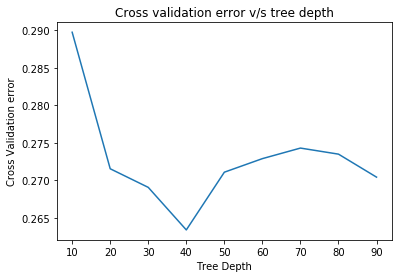

In [137]:
depth=[(10, 0.71028561726651074), (20, 0.72844879099604232), (30, 0.73092370558693731), (40, 0.736583664340551), (50, 0.72890410895501179), (60, 0.72710001638857658), (70, 0.72569578284064862), (80, 0.7265034788057253), (90, 0.72956329823219546)]
d=[]
cve=[]
for i in depth:
    d.append(i[0])
    cve.append(1-i[1])
plt.plot(d,cve)
plt.xlabel('Tree Depth')
plt.ylabel('Cross Validation error')
plt.title('Cross validation error v/s tree depth')
print("Max depth of 40 gives lowest error")

Task2 c) Test error on pruned tree

In [139]:
best_classifier = tree.DecisionTreeClassifier(criterion="entropy",max_depth=40)
clsf2 = best_classifier.fit(D_train,y_train)
best_predictions = best_classifier.predict(D_test)
counter=0
total=0
for i,j in zip(y_test,best_predictions):
    if i==j:
        counter=counter+1
    total=total+1
print("Test error with pruning and depth=40:",1-(counter/total))
print("The accuracy increase on depth of 40 instead of going till last because of tree pruning")

Test error with pruning and depth=40: 0.2691511387163561
The accuracy increase on depth of 40 instead of going till last because of tree pruning


In [140]:
print("Test Error with Pruning on depth of 40 [percentage]:26.91%")

Test Error with Pruning on depth of 40 [percentage]:26.91%


## Q3: Fit Descion Tree using P and y and report Tree depth,Number of terminal nodes & Test error without any pruning

In [141]:
#Task3
from sklearn.model_selection import train_test_split
from sklearn import tree
P_train,P_test,y_train,y_test = train_test_split(P,y,test_size=0.20)
classifier_PCA = tree.DecisionTreeClassifier(criterion="entropy")
clsf2 = classifier_PCA.fit(P_train,y_train)
print("Tree Depth:",classifier_PCA.tree_.max_depth)
print("Number of terminal nodes (leaves)")
predictions_PCA = classifier_PCA.predict(P_test)
#Task1 b) Test error
counter=0
total=0
for i,j in zip(y_test,predictions_PCA):
    if i==j:
        counter=counter+1
    total=total+1
print("Test error without any pruning on PCA reduced dataset",1-(counter/total))

Tree Depth: 13
Number of terminal nodes (leaves)
Test error without any pruning on PCA reduced dataset 0.5341614906832298


In [142]:
print("Test error without any pruning on PCA reduced dataset[percentage] 53.4%")

Test error without any pruning on PCA reduced dataset[percentage] 53.4%


## Q4:Prune tree by doing a 10 fold cross validation with P and y and report test error and plot  maximum depth hyperparameter versus the cross-validation error

In [ ]:
#Task 4: Cross Validation on PCA reduced data
import sklearn.model_selection as sms
import sklearn.cross_validation as scv
depth_PCA=[]
print("Performing 10 fold cross validation...")
for d in range(10,100,10):
    best_classifier = tree.DecisionTreeClassifier(criterion="entropy",max_depth=d)
    print("Cross Validation starting for level",d)
    acc_scr = scv.cross_val_score(estimator=best_classifier,X=P_train,y=y_train,cv =10,verbose=1,n_jobs=4)
    print("Cross Validation executed for level",d)
    depth_tupl = (d,acc_scr.mean())
    depth_PCA.append(depth_tupl)
print(depth_PCA)

In [ ]:
print(depth_PCA)

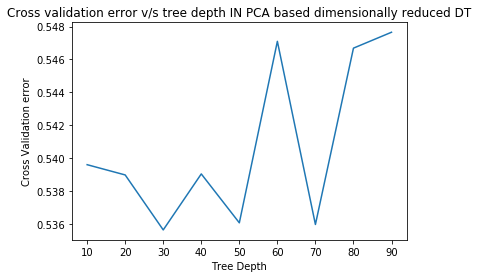

In [143]:
#Task 4 plotting the graph
depth_PCA=[(10, 0.46040201546650267), (20, 0.46102568154924795), (30, 0.46436795296448663), (40, 0.46096348342049848), (50, 0.46393619898458949), (60, 0.45290202597518869), (70, 0.46403692986372702), (80, 0.45331540849573387), (90, 0.45234884563566641)]
d=[]
cve=[]
for i in depth_PCA:
    d.append(i[0])
    cve.append(1-i[1])
plt.plot(d,cve)
plt.xlabel('Tree Depth')
plt.ylabel('Cross Validation error')
plt.title('Cross validation error v/s tree depth IN PCA based dimensionally reduced DT')

In [144]:
#Task4:Test error after pruning and best depth
best_classifier_PCA = tree.DecisionTreeClassifier(criterion="entropy",max_depth=50)
clsf3 = best_classifier_PCA.fit(P_train,y_train)
best_predictions_PCA = best_classifier_PCA.predict(P_test)
counter=0
total=0
for i,j in zip(y_test,best_predictions_PCA):
    if i==j:
        counter=counter+1
    total=total+1
print("Test error with pruning and depth=50:",1-(counter/total))

Test error with pruning and depth=50: 0.5010351966873706


In [145]:
print("Test error with pruning and depth=50 on PCA reduced dataset[Percentage]: 50.1%")

Test error with pruning and depth=50 on PCA reduced dataset[Percentage]: 50.1%


In [146]:
print("Prunning improved the acuracy by reducing test error from 53.4% to 50.1%")

Prunning improved the acuracy by reducing test error from 53.4% to 50.1%


## Q5:2D cross validations on # of PC and tree depth hyper paramters, Report the optimal value of tree depth and # of PC components,Heatmap

In [ ]:
#task 5: 2D cross validation
import sklearn.model_selection as sms
import sklearn.cross_validation as scv
depth=[]
heatmap_Arr=[]
pca = decomposition.PCA()
x_r = pca.fit(dmean_mtrx).transform(dmean_mtrx)
E =pca.components_
print("Performing 10 fold cross validation...")
for k in range(1,2414,300):
    print("Starting iteration with:",k)
    for d in range(10,100,10):
        best_classifier2D = tree.DecisionTreeClassifier(criterion="entropy",max_depth=d)
        acc_scr = scv.cross_val_score(estimator=best_classifier2D,X=P_train[:,:k],y=y_train,cv =10,verbose=1,n_jobs=4)
        heatmap_tupl=(k,d,acc_scr.mean())
        heatmap_Arr.append(heatmap_tupl)
#print(heatmap_Arr)

In [154]:
k=301 
d=50
print("The combination of hyperparameters that minimzes cross-validation error?")
print("Optimal #Pca componenets:", k,"Optimal Depth:",d)

The combination of hyperparameters that minimzes cross-validation error?
Optimal #Pca componenets: 301 Optimal Depth: 50


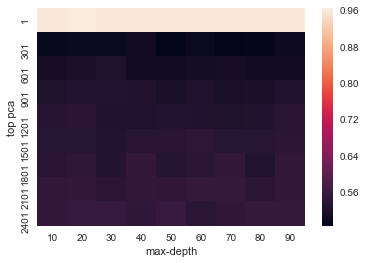

In [151]:
new_Arr=[]
for i in heatmap_Arr:
    new_Arr.append((i[0],i[1],1-i[2]))
import seaborn as sns; sns.set()
import pandas as pd
plot_frame=pd.DataFrame(new_Arr,columns=("top pca","max-depth","Validation Error"))
plot_err = plot_frame.pivot("top pca","max-depth","Validation Error")
ax = sns.heatmap(plot_err)


## Q6:Report the test error after 2D cross validation. Was there a drop?

In [156]:
k=301
d=50
best_classifier_2d = tree.DecisionTreeClassifier(criterion="entropy",max_depth=d)
clsf4 = best_classifier_2d.fit(P_train[:,:k],y_train)
best_predictions_2d = best_classifier_2d.predict(P_test[:,:k])
counter=0
total=0
for i,j in zip(y_test,best_predictions_2d):
    if i==j:
        counter=counter+1
    total=total+1
print("Test error with pruning and depth=50 and with k=301:",1-(counter/total))

Test error with pruning and depth=50 and with k=301: 0.4886128364389234


In [157]:
print("2D CV: Test error with pruning and depth=50 and with k=301[Percentage]: 48.8%")
print("The test error improves from 51%to 48.8%")

2D CV: Test error with pruning and depth=50 and with k=301[Percentage]: 48.8%
The test error improves from 51%to 48.8%


## Q7:Nested 10 fold cross validations(Performed on 3split-10 fold cross validation)

import sklearn.model_selection as sms
import sklearn.cross_validation as scv
kflds = sms.KFold(n_splits=3, shuffle=True)
folds_n=0
final_err=[]
d_lst=[10,20,30,40,50]
for train_index, test_index in kflds.split(D):
        folds_n=folds_n+1
        # split the training data
        X_train, X_test = D[train_index], D[test_index]
        y_train, y_test = y[train_index], y[test_index]
        full_depth =[1]+d_lst[:5]
        err=[]
        for d in full_depth:
            classif = tree.DecisionTreeClassifier(criterion="entropy",max_depth=d,random_state=0)
            acc_scr = sms.cross_validate(estimator=classif,X=X_train,y=y_train,cv =10,verbose=1,n_jobs=-1)
            mean_err= 1-np.mean(list(acc_scr['test_score']))
            err.append(mean_err)
        
        b_d = full_depth[np.argmin(err)]
        classif2 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=b_d,random_state=0)
        classif2.fit(X_train, y_train)
        prediction2 = classif2.predict(X_test)
        counter=0
        total=0
        for i,j in zip(y_test,prediction2):
            if i==j:
                counter=counter+1
                total=total+1
        s = (counter/total)
        ltest=len(X_test)
        ltrain = len(X_train)
        final_err.append((ltest*(1-s))/ltrain)
print("Test error:",np.mean(final_err))

In [ ]:
import sklearn.model_selection as sms
import sklearn.cross_validation as scv
kflds = sms.KFold(n_splits=3, shuffle=True)
folds_n=0
final_err=[]
d_lst=[10,20,30,40,50]
for train_index, test_index in kflds.split(D):
        folds_n=folds_n+1
        # split the training data
        X_train, X_test = D[train_index], D[test_index]
        y_train, y_test = y[train_index], y[test_index]
        full_depth =[1]+d_lst[:5]
        err=[]
        for d in full_depth:
            classif = tree.DecisionTreeClassifier(criterion="entropy",max_depth=d,random_state=0)
            acc_scr = sms.cross_validate(estimator=classif,X=X_train,y=y_train,cv =10,verbose=1,n_jobs=-1)
            mean_err= 1-np.mean(list(acc_scr['test_score']))
            err.append(mean_err)
        b_d = full_depth[np.argmin(err)]
        classif2 = tree.DecisionTreeClassifier(criterion="entropy",max_depth=b_d,random_state=0)
        classif2.fit(X_train, y_train)
        prediction2 = classif2.predict(X_test)
        counter=0
        total=0
        for i,j in zip(y_test,prediction2):
            if i==j:
                counter=counter+1
            total=total+1
        s = (counter/total)
        ltest=len(X_test)
        ltrain = len(X_train)
        final_err.append((ltest*(1-s))/ltrain)

In [123]:
print("The test error obtained is",np.mean(final_err))

The test error obtained is 0.500344525256


Our test error here is slightly higher than the one we got when the test data was held out(which was around 48%)

Model selection without nested CV(first approch) uses the same data to tune model parameters and evaluate model performance.
Information may thus “leak” into the model and overfit the data. resulting in lower "false" test error.

Hence to get a true picture of the "true" test error we should use nested CV as a better source of truth.

Ref: See Cawley and Talbot [1] for an analysis of these issues.

In [122]:


from IPython.display import HTML



HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')